## **Propose a categorization of the different customers**

## **Librerias**

In [63]:
!pip install kneed

In [64]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler


## **Carga de datos**

In [80]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/fraud_data_complete_final.csv")
data = data.drop(data.columns[0], axis=1)
data.head(7)

,ID_USER,genero,monto,fecha,hora,dispositivo,establecimiento,ciudad,tipo_tc,linea_tc,interes_tc,status_txn,is_prime,dcto,cashback,fraude
0,0,F,608.345633,2020-01-21,20,ANDROID,Super,Merida,Fisica,71000.0,51.0,Aceptada,False,60.834563,5.475111,False
1,0,F,88.719243,2020-01-15,7,ANDROID,MPago,Merida,Virtual,71000.0,51.0,Aceptada,False,0.000000,1.774385,False
2,1,F,790.037653,2020-01-17,11,ANDROID,MPago,Guadalajara,Virtual,94000.0,56.0,En proceso,False,0.000000,15.800753,False
3,1,F,767.005387,2020-01-05,11,WEB,MPago,Guadalajara,Fisica,94000.0,56.0,Aceptada,False,0.000000,7.670054,False
4,1,F,254.171053,2020-01-30,10,ANDROID,Farmacia,Guadalajara,Fisica,94000.0,56.0,Aceptada,False,0.000000,2.541711,False
5,1,F,37.003747,2020-01-27,3,ANDROID,MPago,Guadalajara,Fisica,94000.0,56.0,Rechazada,False,0.000000,0.370037,False
6,1,F,334.516017,2020-01-06,2,ANDROID,Abarrotes,Guadalajara,Fisica,94000.0,56.0,Aceptada,False,33.451602,3.010644,False


In [81]:
data_features = ['dispositivo', 'establecimiento','ciudad', 'tipo_tc', 'linea_tc', 'interes_tc', 'is_prime', 'fraude']
data_customer = data[data_features]

## **One-hot encoding y Estandarización**

In [82]:
numeric_cols = data_customer.select_dtypes(include=['float64', 'int']).columns.to_list()
cat_cols = data_customer.select_dtypes(include=['object', 'category', 'bool']).columns.to_list()

In [83]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_selector
# Se estandarizan las columnas numéricas y se codifican las categoricas

preprocessor = ColumnTransformer(
                   [('scale', StandardScaler(), numeric_cols),
                    ('onehot', OneHotEncoder(handle_unknown='ignore'), cat_cols)],
                remainder='passthrough')


data_prep_customer = preprocessor.fit_transform(data_customer)

In [84]:
data_prep_customer = pd.DataFrame(data_prep_customer)

In [85]:
data_prep_customer

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.377875,0.322654,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,0.377875,0.322654,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
2,1.415205,0.846337,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
3,1.415205,0.846337,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,1.415205,0.846337,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6904,1.415205,-0.305766,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
6905,1.415205,-0.305766,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
6906,1.415205,-0.305766,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
6907,1.415205,-0.305766,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [89]:
labels

array(['linea_tc', 'interes_tc', 'dispositivo_ANDROID', 'dispositivo_WEB',
       'establecimiento_Abarrotes', 'establecimiento_Farmacia',
       'establecimiento_MPago', 'establecimiento_Restaurante',
       'establecimiento_Super', 'ciudad_Guadalajara', 'ciudad_Merida',
       'ciudad_Monterrey', 'ciudad_Toluca', 'tipo_tc_Fisica',
       'tipo_tc_Virtual', 'is_prime_False', 'is_prime_True',
       'fraude_False', 'fraude_True'], dtype=object)

In [94]:
encoded_cat = preprocessor.named_transformers_['onehot'].get_feature_names(cat_cols)
labels = np.concatenate([numeric_cols, encoded_cat])

#datos_costumer2 = preprocessor.transform(data_customer)
datos_costumer2 = pd.DataFrame(data_prep_customer)
datos_costumer2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6909 entries, 0 to 6908
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       6909 non-null   float64
 1   1       6909 non-null   float64
 2   2       6909 non-null   float64
 3   3       6909 non-null   float64
 4   4       6909 non-null   float64
 5   5       6909 non-null   float64
 6   6       6909 non-null   float64
 7   7       6909 non-null   float64
 8   8       6909 non-null   float64
 9   9       6909 non-null   float64
 10  10      6909 non-null   float64
 11  11      6909 non-null   float64
 12  12      6909 non-null   float64
 13  13      6909 non-null   float64
 14  14      6909 non-null   float64
 15  15      6909 non-null   float64
 16  16      6909 non-null   float64
 17  17      6909 non-null   float64
 18  18      6909 non-null   float64
dtypes: float64(19)
memory usage: 1.0 MB


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [96]:
datos_costumer2.columns = labels
datos_costumer2

,linea_tc,interes_tc,dispositivo_ANDROID,dispositivo_WEB,establecimiento_Abarrotes,establecimiento_Farmacia,establecimiento_MPago,establecimiento_Restaurante,establecimiento_Super,ciudad_Guadalajara,ciudad_Merida,ciudad_Monterrey,ciudad_Toluca,tipo_tc_Fisica,tipo_tc_Virtual,is_prime_False,is_prime_True,fraude_False,fraude_True
0,0.377875,0.322654,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,0.377875,0.322654,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
2,1.415205,0.846337,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
3,1.415205,0.846337,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,1.415205,0.846337,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6904,1.415205,-0.305766,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
6905,1.415205,-0.305766,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
6906,1.415205,-0.305766,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
6907,1.415205,-0.305766,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


## **Número óptimo de clústeres**

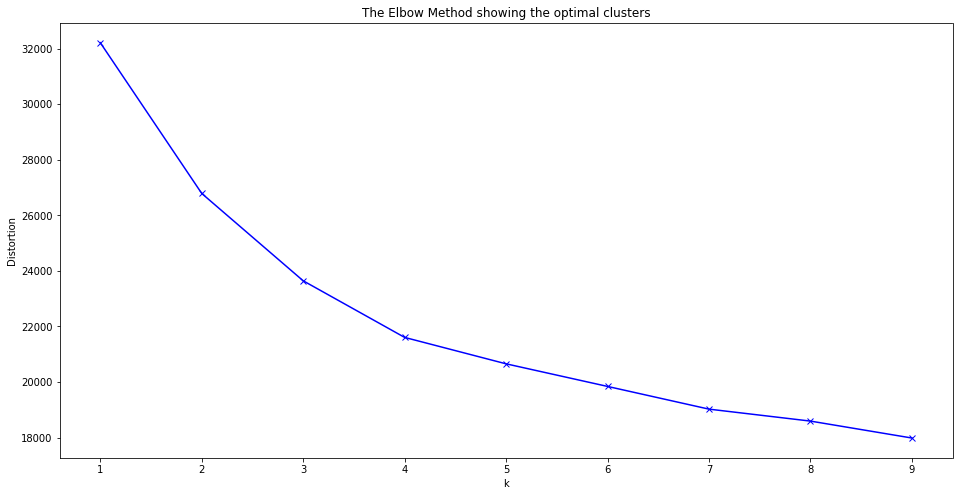

In [97]:
# Collecting the distortions into list
distortions = []
K = range(1,10)
for k in K:
 kmeanModel = KMeans(n_clusters=k)
 kmeanModel.fit(datos_costumer2)
 distortions.append(kmeanModel.inertia_)# Plotting the distortions
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal clusters')
plt.show()

In [98]:
#Taking 4 clusters
km1=KMeans(n_clusters=7)
#Fitting the input data
km1.fit(datos_costumer2)
#predicting the labels of the input data
y=km1.predict(datos_costumer2)
#adding the labels to a column named label
datos_costumer2["label"] = y
#The new dataframe with the clustering done
datos_costumer2.head()

,linea_tc,interes_tc,dispositivo_ANDROID,dispositivo_WEB,establecimiento_Abarrotes,establecimiento_Farmacia,establecimiento_MPago,establecimiento_Restaurante,establecimiento_Super,ciudad_Guadalajara,ciudad_Merida,ciudad_Monterrey,ciudad_Toluca,tipo_tc_Fisica,tipo_tc_Virtual,is_prime_False,is_prime_True,fraude_False,fraude_True,label
0,0.377875,0.322654,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1
1,0.377875,0.322654,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1
2,1.415205,0.846337,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1
3,1.415205,0.846337,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,6
4,1.415205,0.846337,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1


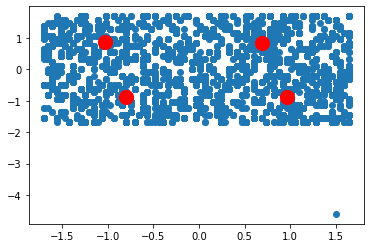

In [74]:
kmeans = KMeans(n_clusters = 4,                 # Set amount of clusters
                init = 'k-means++',             # Initialization method for kmeans
                max_iter = 300,                 # Maximum number of iterations
                n_init = 10,                    # Choose how often algorithm will run with different centroid
                random_state = 0)               # Choose random state for reproducibility

pred_y = kmeans.fit_predict(X)


# Plot the data
plt.scatter(X[:,0], 
            X[:,1])

# Plot the clusters 
plt.scatter(kmeans.cluster_centers_[:, 0], 
            kmeans.cluster_centers_[:, 1], 
            s=200,                             # Set centroid size
            c='red')                           # Set centroid color
plt.show()